### Import Libraries

In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
import seaborn as sns
sns.set(style='whitegrid')
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans,DBSCAN
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV, KFold, train_test_split
import xgboost as xgb
from scipy.stats import uniform, randint

### Read Data

In [2]:
data = pd.read_excel(r"D:/python projects/read_files/dataset.xlsx")

In [3]:
data.head(5)

,I am currently employed at least part-time,I identify as having a mental illness,Education,I have my own computer separate from a smart phone,I have been hospitalized before for my mental illness,How many days were you hospitalized for your mental illness,I am legally disabled,I have my regular access to the internet,I live with my parents,I have a gap in my resume,...,Obsessive thinking,Mood swings,Panic attacks,Compulsive behavior,Tiredness,Age,Gender,Household Income,Region,Device Type
0,0,0,High School or GED,0,0,0.0,0,1,0,1,...,1.0,0.0,1.0,0.0,0.0,30-44,Male,"$25,000-$49,999",Mountain,Android Phone / Tablet
1,1,1,Some Phd,1,0,0.0,0,1,0,0,...,0.0,0.0,1.0,0.0,1.0,18-29,Male,"$50,000-$74,999",East South Central,MacOS Desktop / Laptop
2,1,0,Completed Undergraduate,1,0,0.0,0,1,0,0,...,0.0,0.0,0.0,0.0,0.0,30-44,Male,"$150,000-$174,999",Pacific,MacOS Desktop / Laptop
3,0,0,Some Undergraduate,1,0,NaN,0,1,1,1,...,0.0,0.0,0.0,0.0,0.0,30-44,Male,"$25,000-$49,999",New England,Windows Desktop / Laptop
4,1,1,Completed Undergraduate,1,1,35.0,1,1,0,1,...,1.0,1.0,1.0,1.0,1.0,30-44,Male,"$25,000-$49,999",East North Central,iOS Phone / Tablet


#### General Column Handling

In [4]:
data.columns = data.columns.str.replace(' ','')
data.columns = data.columns.str.lower()

### Specifies features and target

I will specify the features which are the mental health issues category and several columns that i think could be handy for the machine to learn, also the target which is iamunemployed which i will rename as employed to easier the calling

In [5]:
data = data[['lackofconcentration', 'anxiety', 'depression', 'obsessivethinking',
        'moodswings', 'panicattacks', 'compulsivebehavior', 'tiredness', 'age',
        'gender', 'householdincome','iamunemployed']]

In [6]:
data.rename(columns = {'iamunemployed' : 'unemployed'},inplace=True)

In [7]:
data.head(5)

,lackofconcentration,anxiety,depression,obsessivethinking,moodswings,panicattacks,compulsivebehavior,tiredness,age,gender,householdincome,unemployed
0,1.0,1,1,1.0,0.0,1.0,0.0,0.0,30-44,Male,"$25,000-$49,999",1
1,1.0,1,1,0.0,0.0,1.0,0.0,1.0,18-29,Male,"$50,000-$74,999",0
2,0.0,0,0,0.0,0.0,0.0,0.0,0.0,30-44,Male,"$150,000-$174,999",0
3,0.0,0,0,0.0,0.0,0.0,0.0,0.0,30-44,Male,"$25,000-$49,999",1
4,1.0,1,1,1.0,1.0,1.0,1.0,1.0,30-44,Male,"$25,000-$49,999",0


In [8]:
data.shape

(334, 12)

#### Null Checking

I will check missing values and if they exist i will impute them with median if their dtypes is numerical or  most frequent if their dtype is numerical

In [9]:
data.isnull().sum()

lackofconcentration    1
anxiety                0
depression             0
obsessivethinking      1
moodswings             1
panicattacks           1
compulsivebehavior     1
tiredness              1
age                    0
gender                 0
householdincome        0
unemployed             0
dtype: int64

In [10]:
def fillna(df):
    for column in df.columns:
        if df[column].dtype == object:
            simo = SimpleImputer(strategy='most_frequent')
            df[column] = simo.fit_transform(df[column].values.reshape(-1,1))
        else:
            sime = SimpleImputer(strategy='median')
            df[column] = sime.fit_transform(df[column].values.reshape(-1,1))
            
fillna(data)

#### Checking duplicated records

I will check for duplications

In [11]:
data.duplicated().sum()

87

In [12]:
data.drop_duplicates(keep=False,inplace=True)

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 199 entries, 0 to 333
Data columns (total 12 columns):
lackofconcentration    199 non-null float64
anxiety                199 non-null float64
depression             199 non-null float64
obsessivethinking      199 non-null float64
moodswings             199 non-null float64
panicattacks           199 non-null float64
compulsivebehavior     199 non-null float64
tiredness              199 non-null float64
age                    199 non-null object
gender                 199 non-null object
householdincome        199 non-null object
unemployed             199 non-null float64
dtypes: float64(9), object(3)
memory usage: 20.2+ KB


In [14]:
data.describe()

,lackofconcentration,anxiety,depression,obsessivethinking,moodswings,panicattacks,compulsivebehavior,tiredness,unemployed
count,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000
mean,0.246231,0.457286,0.396985,0.201005,0.180905,0.236181,0.135678,0.407035,0.351759
std,0.431901,0.499429,0.490507,0.401763,0.385910,0.425806,0.343310,0.492521,0.478723
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<Figure size 432x288 with 0 Axes>

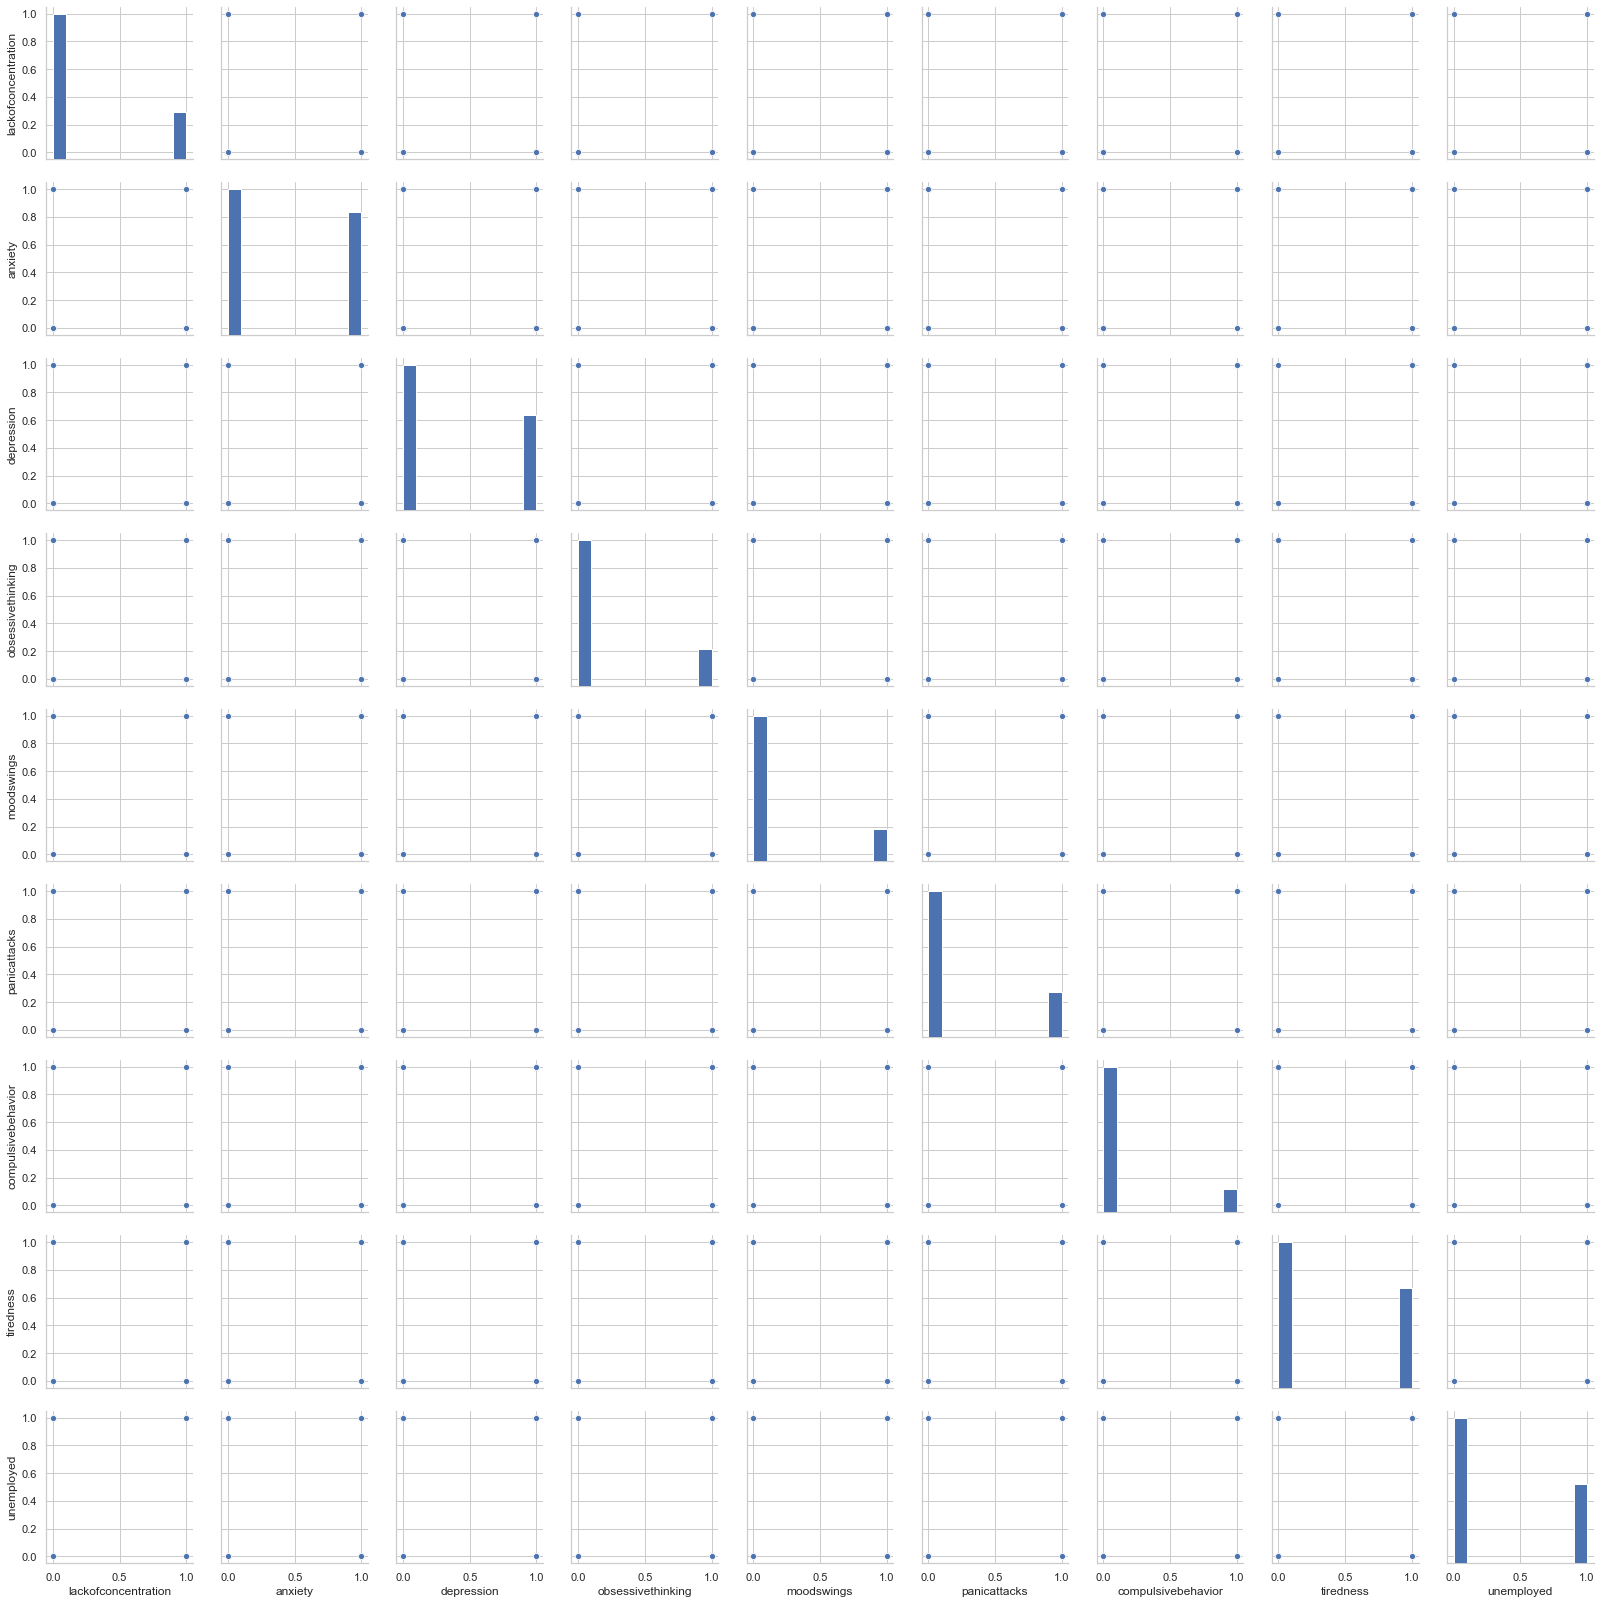

In [15]:
plt.figure()
sns.pairplot(data)

#### NOTE : The scatterplot is normal looking for this data since the input is 1.0. This plot is not really meaningful to me, so i will not explore further for the distribution and i will jump to the correlation and model building to seek more insightful information

### Data Exploration

#### Plot Correlation

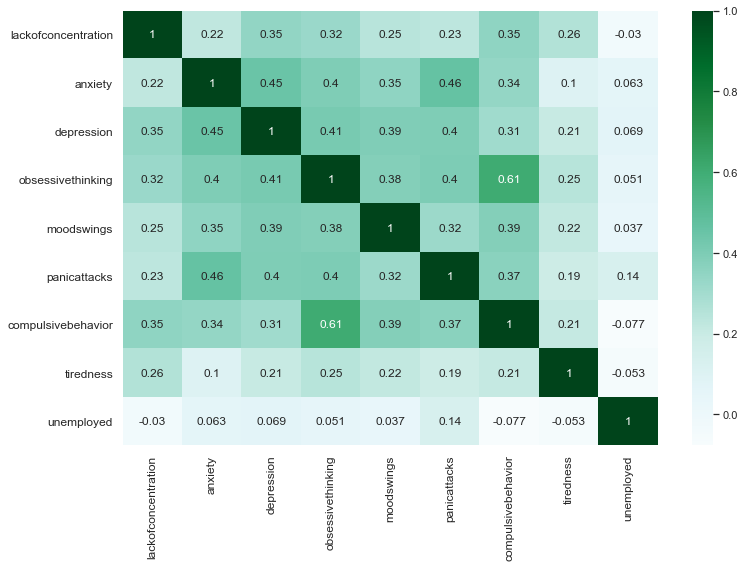

In [16]:
plt.figure(figsize=(12,8))
sns.heatmap(data.corr(),annot=True,annot_kws={'size':12},cmap="BuGn")
plt.tick_params(labelsize=12)

### Specifying top 5th features and target

I will specify top 5th features and target

In [17]:
data = data[['panicattacks','compulsivebehavior',
             'depression', 'anxiety',
             'tiredness','unemployed'
             ]]

#### Create dataframe for classification later

I will make copy of data before i scale it so i don't need to work twice on preparing again. This will be used for the final result conlusion and classification

In [18]:
cat_data = data.copy()
final_data = data.copy()

### Cluster Model Building

#### PCA to optimize DBSCAN

In [19]:
scp = StandardScaler()
data = scp.fit_transform(data)

pca = PCA(n_components=1)
pca = pca.fit(data)
pca_data = pca.transform(data)

#### DBSCAN PCA Fitting

In [20]:
dbscan = DBSCAN(eps=0.3, min_samples = np.log(data.shape[0]))
dbc_pca = dbscan.fit_predict(pca_data)

#### DBSCAN Base Model

In [21]:
dbc = dbscan.fit_predict(data)

### Cluster Evaluation

I will compare how good PCA outperform the base model without PCA

In [22]:
def validate(X,model):
    s_metrics = metrics.silhouette_score(X, model)
    dbi_metrics = metrics.davies_bouldin_score(X, model)
    print('Silhouette score : %s'%s_metrics)
    print('DBI score : %s'%dbi_metrics)

In [23]:
validate(data,dbc)

Silhouette score : 0.6076747440544061
DBI score : 1.0150160897985485


In [24]:
validate(pca_data,dbc_pca)

Silhouette score : 0.750866715857714
DBI score : 0.3059602855691396


### Classification Model Building 

In [25]:
cat_data['cluster'] = dbc_pca

In [26]:
cat_data.columns

Index(['panicattacks', 'compulsivebehavior', 'depression', 'anxiety',
       'tiredness', 'unemployed', 'cluster'],
      dtype='object')

#### Plot Correlations

Before i really build the model i'd like to see how related my features towards my target, which is not that bad

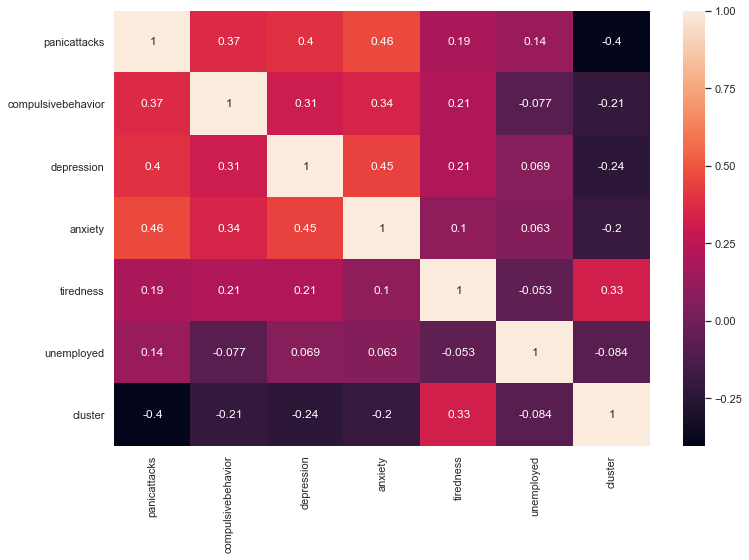

In [27]:
corrdf = pd.get_dummies(cat_data).corr()
plt.figure(figsize=(12,8))
sns.heatmap(cat_data.corr(),annot=True)

In [28]:
X = np.array(cat_data.drop(['unemployed'],1))
y = np.array(cat_data['unemployed'])

X = StandardScaler().fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


### XGBClassifier Hyperparameter Tuning with GridSearchCV + Fitting

In [29]:
xgb_model = xgb.XGBClassifier()
params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [5, 10, 20 ,30],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [10, 20, 50],
        'learning_rate': [0.01,0.02,0.1,0.3]
}

grid = GridSearchCV(estimator= xgb_model,param_grid =params,
                    refit=True,verbose=1,cv =10,n_jobs=-1)
grid.fit(X_train,y_train)

Fitting 10 folds for each of 1296 candidates, totalling 12960 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done 2320 tasks      | elapsed:   19.1s
[Parallel(n_jobs=-1)]: Done 6320 tasks      | elapsed:   46.1s
[Parallel(n_jobs=-1)]: Done 11920 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 12960 out of 12960 | elapsed:  1.5min finished


GridSearchCV(cv=10, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='deprecated', n_jobs=-1,
             param_grid={'colsample_bytree': [0.6, 0.8, 1.0],
                         'gamma': [5, 10, 20, 30],
                         'learning_rate': [0.01, 0.02, 0.1, 0.3],

### XGBClassifier Base Model

In [30]:
xgb_base_model = xgb.XGBClassifier()
xgb_base_model.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

### Classification Model Evaluation

I will compare the performance of my regularized XGBClassifier model with base XGBClassifier model

In [31]:
def evaluate(model,X_train,y_train,X_test,y_test):
    y_pred = model.predict(X_test)
    accuracy = metrics.accuracy_score(y_test, y_pred)
    print('Training set score : %s'%model.score(X_train,y_train))
    print('Test set score : %s'%model.score(X_test,y_test))
    print('Accuracy score : %s'%accuracy)

In [32]:
best_param = grid.best_estimator_
evaluate(best_param,X_train,y_train,X_test,y_test)

Training set score : 0.6415094339622641
Test set score : 0.675
Accuracy score : 0.675


In [33]:
print(best_param)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.6, gamma=5,
              learning_rate=0.01, max_delta_step=0, max_depth=10,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.6, verbosity=1)


In [34]:
evaluate(xgb_base_model,X_train,y_train,X_test,y_test)

Training set score : 0.660377358490566
Test set score : 0.65
Accuracy score : 0.65


### Conclusion

### 1. Plot Unemployed Based On Clusters

In [35]:
y_pred = best_param.predict(X_test)

In [36]:
unemployed_new = np.append(y_train,y_pred)

In [37]:
final_data = final_data.assign(unemployed=unemployed_new)
final_data['cluster'] = dbc_pca

In [38]:
final_data['unemployed'] = final_data['unemployed'].replace(to_replace=[1.0,0.0],value=['yes','no'])
conclusion = final_data.groupby(['cluster','unemployed'])['unemployed'].count()
print(conclusion)

cluster  unemployed
-1       no             1
         yes            1
 0       no             8
         yes            1
 1       no            11
         yes            3
 2       no            34
         yes           17
 3       no            10
         yes            3
 4       no            23
         yes           14
 5       no            31
         yes           10
 6       no            24
         yes            8
Name: unemployed, dtype: int64


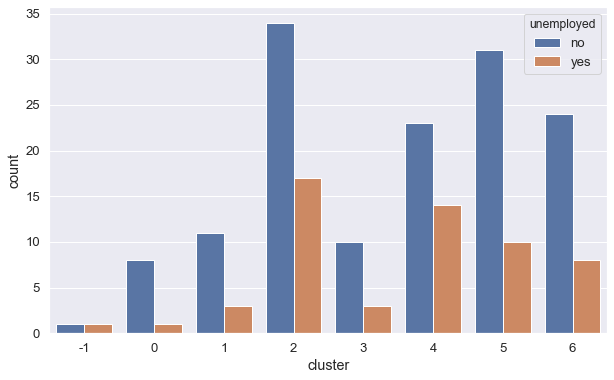

In [39]:
plt.figure(figsize=(10,6))
sns.set(font_scale=1.2)
sns.countplot(x="cluster", hue="unemployed", data=final_data)

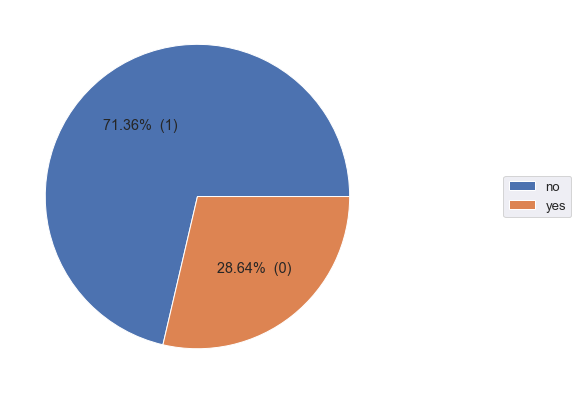

In [40]:
plt.figure(figsize=(7,7))
sns.set(font_scale=1.2)
plt.pie(final_data.groupby(['unemployed'])['unemployed'].count(),
        autopct=lambda p : '{:.2f}%  ({:,.0f})'.format(p,p * sum(corrdf['unemployed'])/100))
plt.legend(final_data['unemployed'].unique(),loc='center right',
            bbox_to_anchor=(1, 0, 0.5, 1))

Based on the clusters, clusters those are likely to be unemployed in rank are cluster 2,5,6,4,3,2,1,0 and from the bar we could learn that people with mental health issues still have high chances to be employed so it does not effect employment much by still having 71,86% to be employed

### Clusters Based On Mental Health Issues Which Are Unemployed

In [41]:
final_data.columns

Index(['panicattacks', 'compulsivebehavior', 'depression', 'anxiety',
       'tiredness', 'unemployed', 'cluster'],
      dtype='object')

In [42]:
unemployed = final_data.iloc[:,np.r_[0:4,-2:0]][final_data['unemployed']=='yes']

In [43]:
unemployed = unemployed.groupby(['cluster'])['panicattacks', 'compulsivebehavior', 'depression', 'anxiety'].sum()
unemployed

,panicattacks,compulsivebehavior,depression,anxiety
cluster,,,,
-1,1.0,1.0,1.0,1.0
0,1.0,0.0,1.0,1.0
1,2.0,1.0,3.0,3.0
2,0.0,0.0,0.0,0.0
3,3.0,3.0,3.0,3.0
4,2.0,4.0,12.0,10.0
5,1.0,0.0,5.0,4.0
6,0.0,0.0,0.0,0.0


### 2. Model Conclusion

1. **Clustering Model :**  The clustering model which is optimized by PCA outperforms the model without PCA optimization. PCA is very useful for data with many features. It's well known to help us to tackle the curse of dimension issue since many of the real world dataset would likely have dozens of features. From this experiment, i could see that it's also handy for small data. From this kernel the higher Silhouette Coefficient the better the model defines the clusters. While the DBI score if the values closer to zero the better partition or separation between the clusters we have. In this kernel we see that the DBSCAN with PCA outperforms 15% from the base model for the Silhouette score. And the DBI score outperforms 70% from the base model.
2. **Clustering Model :**  The classification model which is optimized by GridSearchCV outperforms the base model 0.25%. That's okay since hyperparameter tuning needs a lot of trials and errors. But the important point is with optimization. Model could learn better.